In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the datasets

data_df = pd.read_csv('../data/data.csv')
rating_df = pd.read_csv('../data/rating.csv')
raw_data_df = pd.read_csv('../data/traffic.csv')
domain_loc = pd.read_csv('../data/domains_location.csv')


In [21]:
print('Info for Data frame')
data_df.info()
print('Info for Data frame')
rating_df.info()
print('Info for Raw Data frame')
raw_data_df.info()

Info for Data frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105375 entries, 0 to 105374
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_id    105375 non-null  int64 
 1   source_id     24495 non-null   object
 2   source_name   105375 non-null  object
 3   author        97156 non-null   object
 4   title         105335 non-null  object
 5   description   104992 non-null  object
 6   url           105375 non-null  object
 7   url_to_image  99751 non-null   object
 8   published_at  105375 non-null  object
 9   content       105375 non-null  object
 10  category      105333 non-null  object
 11  full_content  58432 non-null   object
dtypes: int64(1), object(11)
memory usage: 9.6+ MB
Info for Data frame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----

In [22]:
# Explore the structure and Content of the dataset
print("Data.csv:")
print(data_df.head())
print("\nRating.csv:")
print(rating_df.head())
print("\nRaw-data.csv:")
print(raw_data_df.head())

Data.csv:
   article_id source_id                   source_name  \
0       89541       NaN  International Business Times   
1       89542       NaN                    Prtimes.jp   
2       89543       NaN                      VOA News   
3       89545       NaN            The Indian Express   
4       89547       NaN           The Times of Israel   

                                       author  \
0                              Paavan MATHEMA   
1                                         NaN   
2  webdesk@voanews.com (Agence France-Presse)   
3                                   Editorial   
4                                 Jacob Magid   

                                               title  \
0  UN Chief Urges World To 'Stop The Madness' Of ...   
1              RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。   
2  UN Chief Urges World to 'Stop the Madness' of ...   
3  Sikkim warning: Hydroelectricity push must be ...   
4  200 foreigners, dual nationals cut down in Ham...   

               

In [4]:
# Understand the variables/columns present in the dataset
print("\nData.csv columns:", data_df.columns)
print("Rating.csv columns:", rating_df.columns)
print("Raw-data.csv columns:", raw_data_df.columns)


Data.csv columns: Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'full_content'],
      dtype='object')
Rating.csv columns: Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment'],
      dtype='object')
Raw-data.csv columns: Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')


In [40]:
print('Data_DF Description')
data_df.describe()


Data_DF Description


,article_id
count,105375.000000
mean,195044.072987
std,199819.981007
min,363.000000
25%,50405.500000
50%,108862.000000
75%,284507.500000
max,781308.000000


In [48]:
data_df['source_name'].value_counts()

source_name
ETF Daily News          16631
The Times of India       7629
GlobeNewswire            5485
Forbes                   4423
Biztoc.com               3968
                        ...  
Knowablemagazine.org        1
News.rub.de                 1
Robertovitillo.com          1
Signoz.io                   1
Omnigroup.com               1
Name: count, Length: 2379, dtype: int64

In [57]:
data_df['source_id'].value_counts().head(10)

source_id
the-times-of-india    7629
bbc-news              3216
business-insider      2746
abc-news              2188
al-jazeera-english    1642
rt                    1129
time                   605
newsweek               381
cbs-news               324
espn                   311
Name: count, dtype: int64

In [58]:
data_df['source_id'].value_counts().tail(10)

source_id
reddit-r-all                   6
google-news                    5
financial-post                 5
techcrunch                     3
medical-news-today             2
australian-financial-review    2
ynet                           1
the-globe-and-mail             1
bloomberg                      1
le-monde                       1
Name: count, dtype: int64

In [54]:
data_df['source_name'].value_counts()

source_name
ETF Daily News          16631
The Times of India       7629
GlobeNewswire            5485
Forbes                   4423
Biztoc.com               3968
                        ...  
Knowablemagazine.org        1
News.rub.de                 1
Robertovitillo.com          1
Signoz.io                   1
Omnigroup.com               1
Name: count, Length: 2379, dtype: int64

In [47]:
data_df

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
105370,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...
105371,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...
105372,781235,NaN,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,https://media.npr.org/assets/img/2023/11/23/sa...,2023-11-29 10:01:12,The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...
105373,781240,NaN,Forbes,"Gary Stern, Contributor, \n Gary Stern, Contri...",Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",https://www.forbes.com/sites/garystern/2023/11...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 13:44:33,Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...


In [64]:
raw_data_df['RefIPs'].head()

0    2151358
1    2250631
2    1852995
3    1757127
4    1598085
Name: RefIPs, dtype: int64

In [45]:
raw_data_df

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,471274,2151358,google.com,com,1,1,471248,2147402
1,2,2,facebook.com,com,465424,2250631,facebook.com,com,2,2,465297,2247135
2,3,3,youtube.com,com,420579,1852995,youtube.com,com,3,3,420483,1848940
3,4,4,twitter.com,com,404985,1757127,twitter.com,com,4,4,404998,1753939
4,5,5,instagram.com,com,364746,1598085,instagram.com,com,5,5,364618,1594892
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,485324,kireie.com,com,222,280,kireie.com,com,-1,-1,-1,-1
999996,999997,485325,mt-lock.com,com,222,280,mt-lock.com,com,952633,461429,232,284
999997,999998,485326,pinkwater.com,com,222,280,pinkwater.com,com,-1,-1,-1,-1
999998,999999,485327,soderhomes.com,com,222,280,soderhomes.com,com,-1,-1,-1,-1


In [60]:
## Websites that have the largest count of news articles (Top 10)
raw_data_df['TLD'].value_counts().head(10)

TLD
com    485328
org     78617
cn      65738
ru      33983
net     33283
de      30563
uk      23369
nl      18021
jp      16665
fr       8992
Name: count, dtype: int64

In [61]:
## Websites that have the largest count of news articles (Bottom 10)
raw_data_df['TLD'].value_counts().tail(10)

TLD
food           1
barclaycard    1
med            1
gu             1
trust          1
voto           1
villas         1
kpn            1
fujitsu        1
xn--t60b56a    1
Name: count, dtype: int64

In [41]:
print('rating DF Description')
rating_df.describe()


rating DF Description


,article_id
count,58356.000000
mean,298958.734492
std,216023.477569
min,418.000000
25%,121776.500000
50%,251651.000000
75%,451541.500000
max,781308.000000


In [42]:
print('Raw Data DF Description')
raw_data_df.describe()

Raw Data DF Description


,GlobalRank,TldRank,RefSubNets,RefIPs,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1.000000e+06
mean,500000.500000,125561.303009,673.701181,1.435953e+03,491269.368692,123337.776967,670.674188,1.421157e+03
std,288675.278932,150467.225087,2078.111624,6.655037e+03,289072.225655,149014.277535,2060.151223,6.603709e+03
min,1.000000,1.000000,222.000000,2.240000e+02,-1.000000,-1.000000,-1.000000,-1.000000e+00
25%,250000.750000,5329.000000,280.000000,3.340000e+02,240862.750000,4879.000000,281.000000,3.340000e+02
50%,500000.500000,43228.000000,392.000000,4.940000e+02,491009.500000,41385.500000,393.000000,4.940000e+02
75%,750000.250000,235328.250000,733.000000,1.062000e+03,741318.250000,230832.250000,734.000000,1.061000e+03
max,1000000.000000,485328.000000,471274.000000,2.250631e+06,1000000.000000,485782.000000,471248.000000,2.247135e+06


In [8]:
## Check for Duplication

In [9]:
data_df.nunique()

article_id      101832
source_id           61
source_name       2379
author           20575
title            98304
description      98488
url             101832
url_to_image     75167
published_at     80508
content          97185
category           257
full_content     54143
dtype: int64

In [18]:
# Missing Values Calculation interms of percentage

(data_df.isnull().sum()/(len(data_df)))*100

article_id       0.000000
source_id       76.754448
source_name      0.000000
author           7.799763
title            0.037960
description      0.363464
url              0.000000
url_to_image     5.337129
published_at     0.000000
content          0.000000
category         0.039858
full_content    44.548517
dtype: float64

In [10]:
raw_data_df.nunique()

GlobalRank        1000000
TldRank            485328
Domain            1000000
TLD                   840
RefSubNets          10307
RefIPs              14248
IDN_Domain        1000000
IDN_TLD               840
PrevGlobalRank     990704
PrevTldRank        480756
PrevRefSubNets      10246
PrevRefIPs          14147
dtype: int64

In [16]:
# Missing values Calculation
(raw_data_df.isnull().sum()/(len(raw_data_df)))*100

GlobalRank        0.0
TldRank           0.0
Domain            0.0
TLD               0.0
RefSubNets        0.0
RefIPs            0.0
IDN_Domain        0.0
IDN_TLD           0.0
PrevGlobalRank    0.0
PrevTldRank       0.0
PrevRefSubNets    0.0
PrevRefIPs        0.0
dtype: float64

In [11]:
rating_df.nunique()

article_id         54583
source_id             10
source_name           29
author              7553
title              53454
description        53165
url                54583
url_to_image       34903
published_at       41387
content            52174
category             256
article            54148
title_sentiment        3
dtype: int64

In [15]:
#Missing Values Calculation

(rating_df.isnull().sum()/(len(rating_df)))*100

article_id          0.000000
source_id          69.547262
source_name         0.000000
author              3.706560
title               0.000000
description         0.017136
url                 0.000000
url_to_image        5.913702
published_at        0.000000
content             0.000000
category            0.035986
article             0.000000
title_sentiment     0.000000
dtype: float64

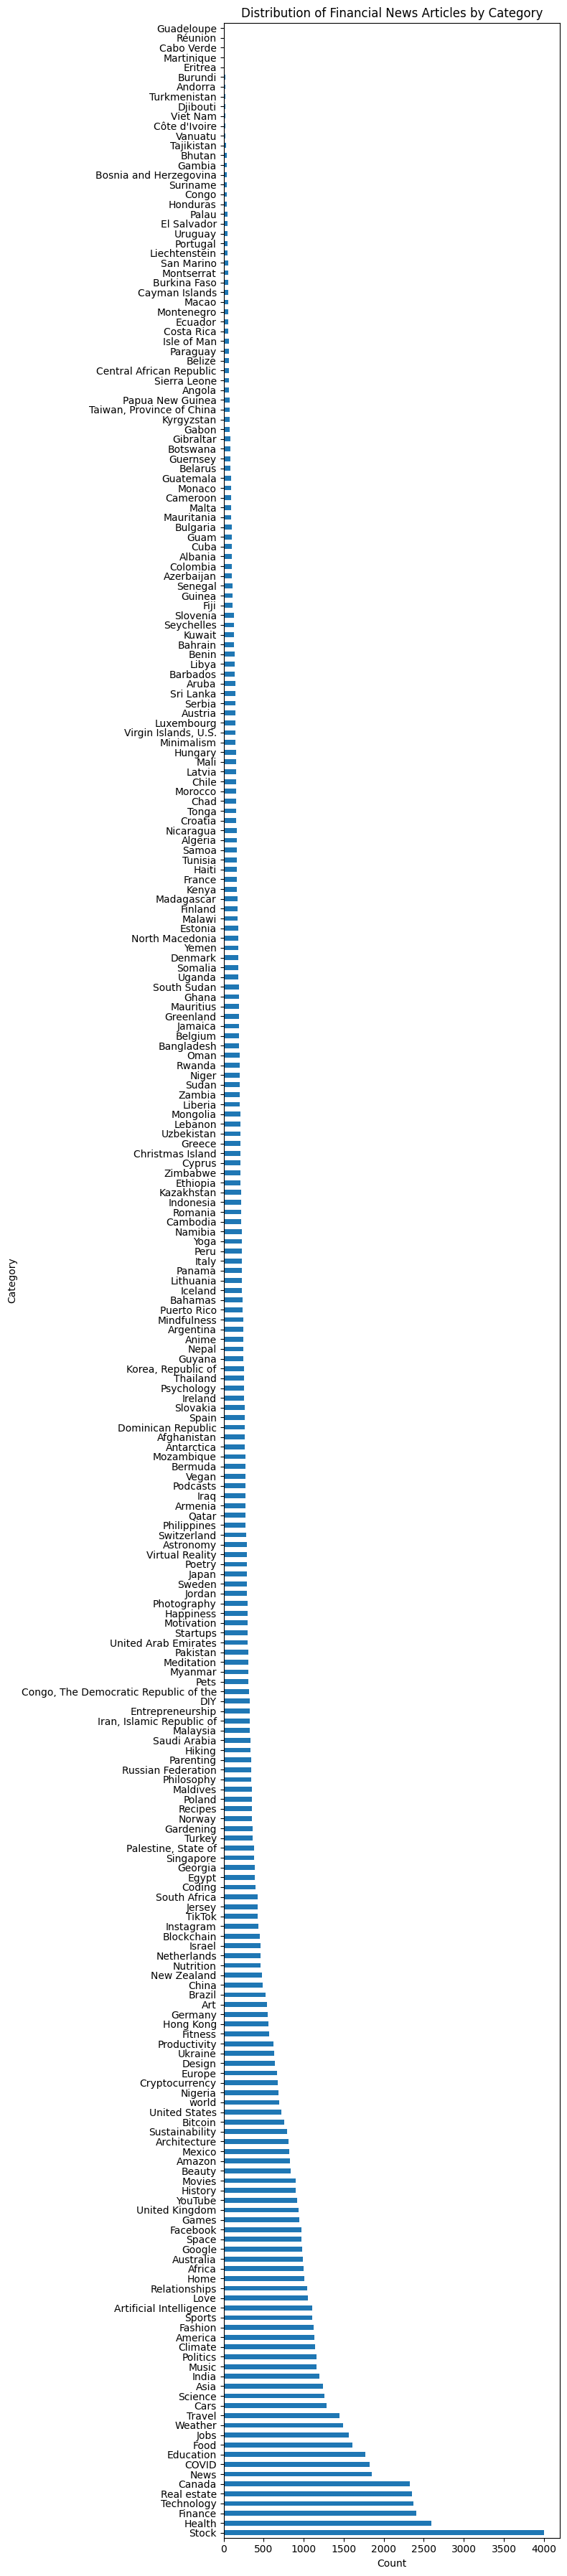

In [5]:
# Explore the distribution of different categories of financial news articles
category_counts = data_df['category'].value_counts()
plt.figure(figsize=(8, 36))  # Adjust the figure size for better vertical text display
category_counts.plot(kind='barh')  # Use barh for horizontal bar plot
plt.title("Distribution of Financial News Articles by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [69]:
data_df['category'].value_counts()

category
Stock          3999
Health         2594
Finance        2402
Technology     2371
Real estate    2352
               ... 
Eritrea          14
Martinique       13
Cabo Verde       11
Réunion           9
Guadeloupe        4
Name: count, Length: 257, dtype: int64

In [70]:
data_df

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
105370,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...
105371,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...
105372,781235,NaN,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,https://media.npr.org/assets/img/2023/11/23/sa...,2023-11-29 10:01:12,The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...
105373,781240,NaN,Forbes,"Gary Stern, Contributor, \n Gary Stern, Contri...",Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",https://www.forbes.com/sites/garystern/2023/11...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 13:44:33,Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...


In [24]:
## Data Summary
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
article_id,105375.0,NaN,NaN,NaN,195044.072987,199819.981007,363.0,50405.5,108862.0,284507.5,781308.0
source_id,24495,61,the-times-of-india,7629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_name,105375,2379,ETF Daily News,16631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,97156,20575,MarketBeat News,16627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,105335,98304,Morning news brief,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,104992,98488,No description,615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url,105375,101832,https://www.globenewswire.com/news-release/202...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url_to_image,99751,75167,https://cdn08.allafrica.com/static/images/stru...,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_at,105375,80508,2023-11-08 10:05:18,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
content,105375,97185,When browsing with ads:\nWe collect personal d...,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
rating_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
article_id,58356.0,NaN,NaN,NaN,298958.734492,216023.477569,418.0,121776.5,251651.0,451541.5,781308.0
source_id,17771,10,the-times-of-india,7504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_name,58356,29,ETF Daily News,16746,NaN,NaN,NaN,NaN,NaN,NaN,NaN
author,56193,7553,MarketBeat News,16742,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,58356,53454,Morning news brief,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,58346,53165,No description,610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url,58356,54583,https://www.ibtimes.com/uk-bans-recreational-u...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url_to_image,54905,34903,https://ml.globenewswire.com/Resource/Download...,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
published_at,58356,41387,2023-11-08 10:05:18,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
content,58356,52174,"Rashmika Mandanna shines in ethnic wear, inspi...",129,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
raw_data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GlobalRank,1000000.0,NaN,NaN,NaN,500000.5,288675.278932,1.0,250000.75,500000.5,750000.25,1000000.0
TldRank,1000000.0,NaN,NaN,NaN,125561.303009,150467.225087,1.0,5329.0,43228.0,235328.25,485328.0
Domain,1000000,1000000,google.com,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TLD,1000000,840,com,485328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RefSubNets,1000000.0,NaN,NaN,NaN,673.701181,2078.111624,222.0,280.0,392.0,733.0,471274.0
RefIPs,1000000.0,NaN,NaN,NaN,1435.953473,6655.037262,224.0,334.0,494.0,1062.0,2250631.0
IDN_Domain,1000000,1000000,google.com,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IDN_TLD,1000000,840,com,485328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrevGlobalRank,1000000.0,NaN,NaN,NaN,491269.368692,289072.225655,-1.0,240862.75,491009.5,741318.25,1000000.0
PrevTldRank,1000000.0,NaN,NaN,NaN,123337.776967,149014.277535,-1.0,4879.0,41385.5,230832.25,485782.0


In [32]:
# For easy analysis let us separate the Numerical and categorical variables for easy analysis

cat_cols0=data_df.select_dtypes(include=['object']).columns
num_cols0 = data_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols0)
print("Numerical Variables:")
print(num_cols0)

Categorical Variables:
Index(['source_id', 'source_name', 'author', 'title', 'description', 'url',
       'url_to_image', 'published_at', 'content', 'category', 'full_content'],
      dtype='object')
Numerical Variables:
['article_id']


In [33]:
# For easy analysis let us separate the Numerical and categorical variables for easy analysis

cat_cols1=rating_df.select_dtypes(include=['object']).columns
num_cols1 = rating_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols1)
print("Numerical Variables:")
print(num_cols1)

Categorical Variables:
Index(['source_id', 'source_name', 'author', 'title', 'description', 'url',
       'url_to_image', 'published_at', 'content', 'category', 'article',
       'title_sentiment'],
      dtype='object')
Numerical Variables:
['article_id']


In [34]:
# For easy analysis let us separate the Numerical and categorical variables for easy analysis

cat_cols2=raw_data_df.select_dtypes(include=['object']).columns
num_cols2 = raw_data_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols2)
print("Numerical Variables:")
print(num_cols2)

Categorical Variables:
Index(['Domain', 'TLD', 'IDN_Domain', 'IDN_TLD'], dtype='object')
Numerical Variables:
['GlobalRank', 'TldRank', 'RefSubNets', 'RefIPs', 'PrevGlobalRank', 'PrevTldRank', 'PrevRefSubNets', 'PrevRefIPs']


a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.
article_id
Skew : 1.32


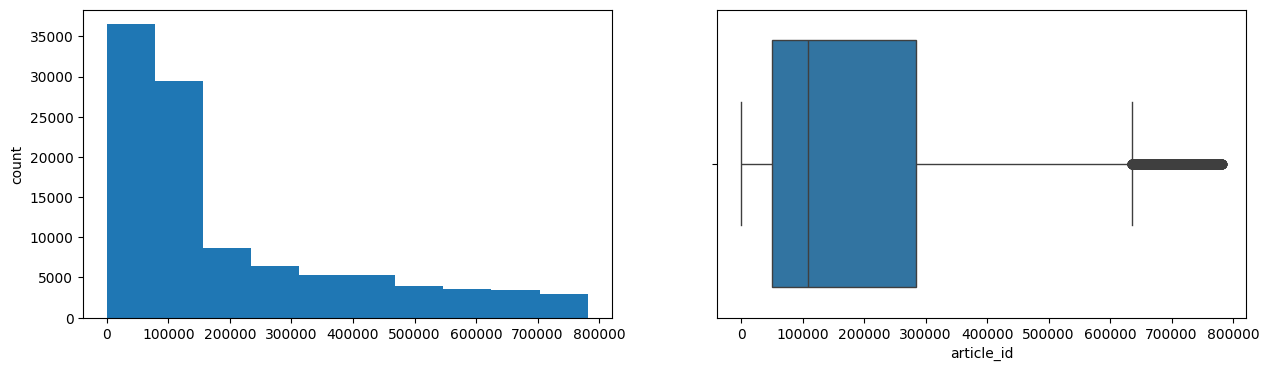

article_id
Skew : 0.54


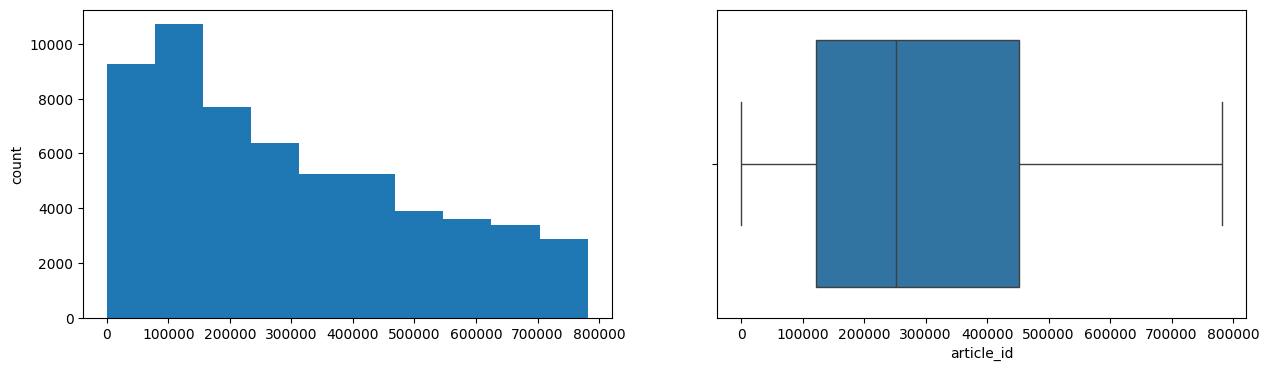

GlobalRank
Skew : -0.0


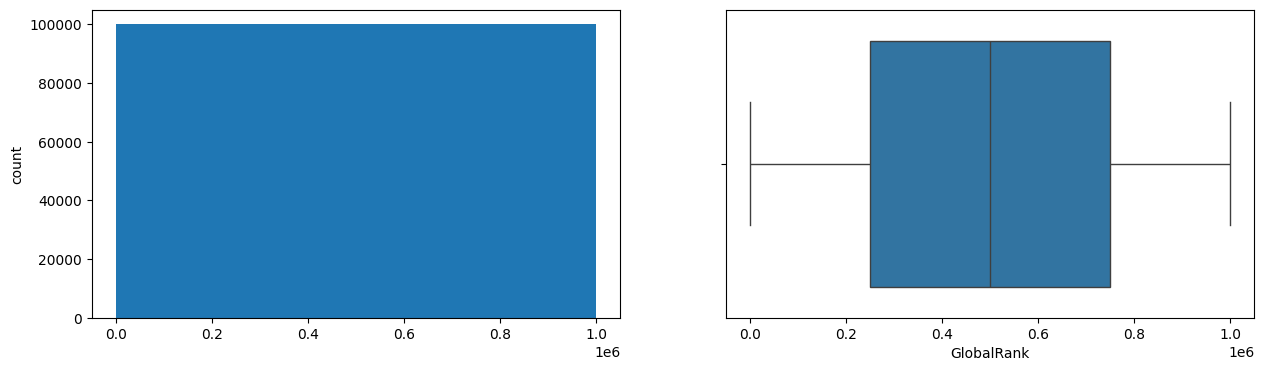

TldRank
Skew : 0.99


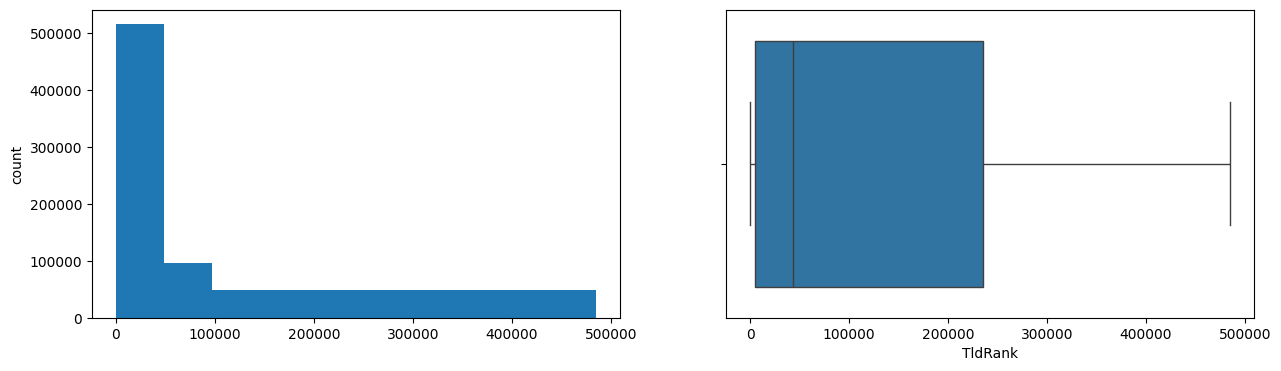

RefSubNets
Skew : 81.14


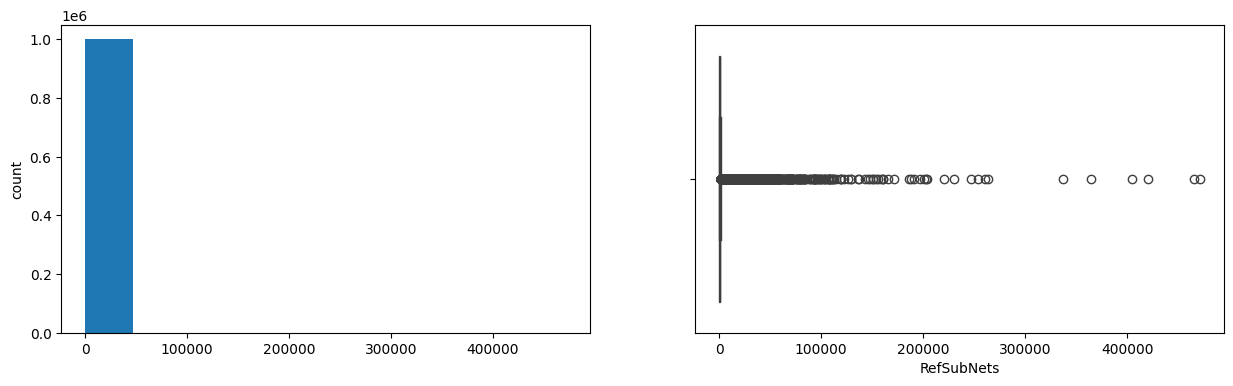

RefIPs
Skew : 162.91


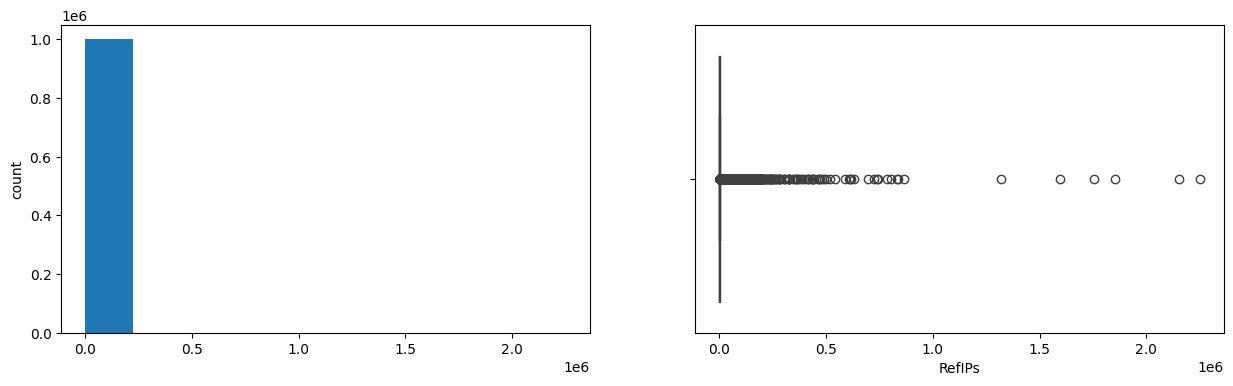

PrevGlobalRank
Skew : 0.0


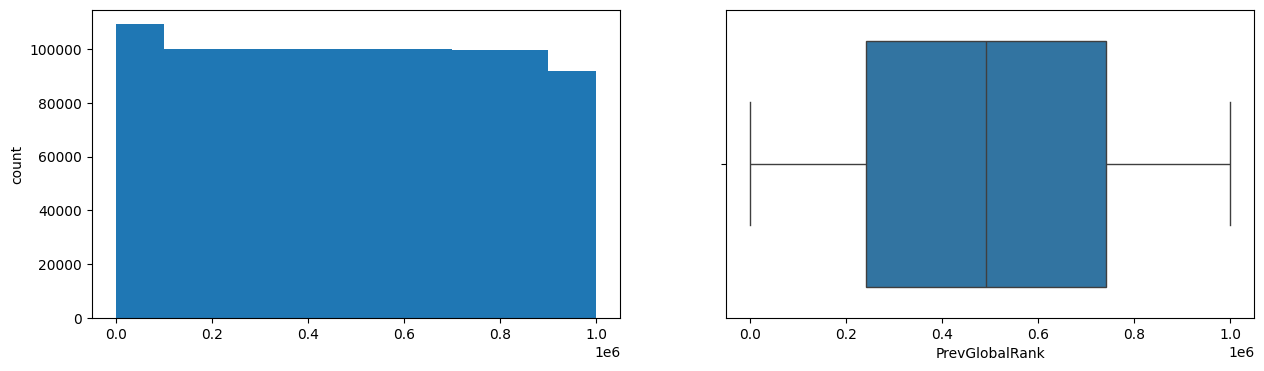

PrevTldRank
Skew : 1.01


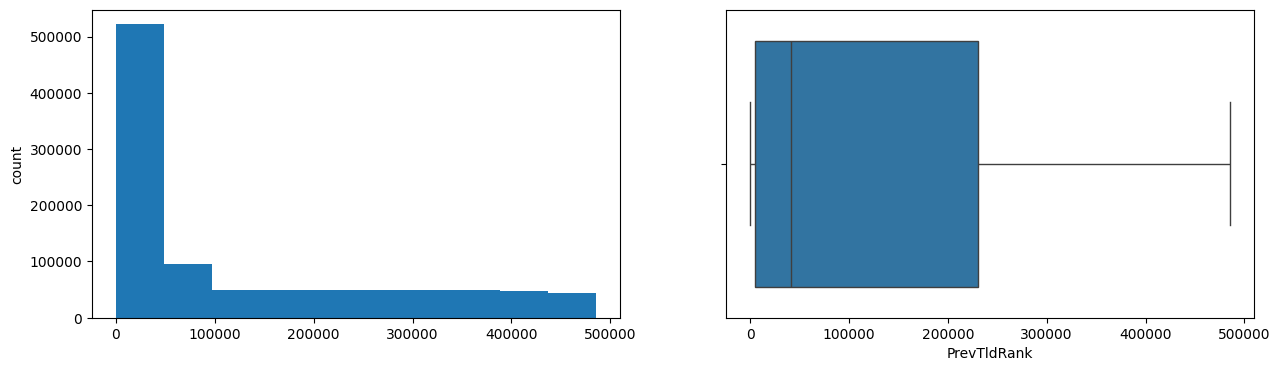

PrevRefSubNets
Skew : 82.56


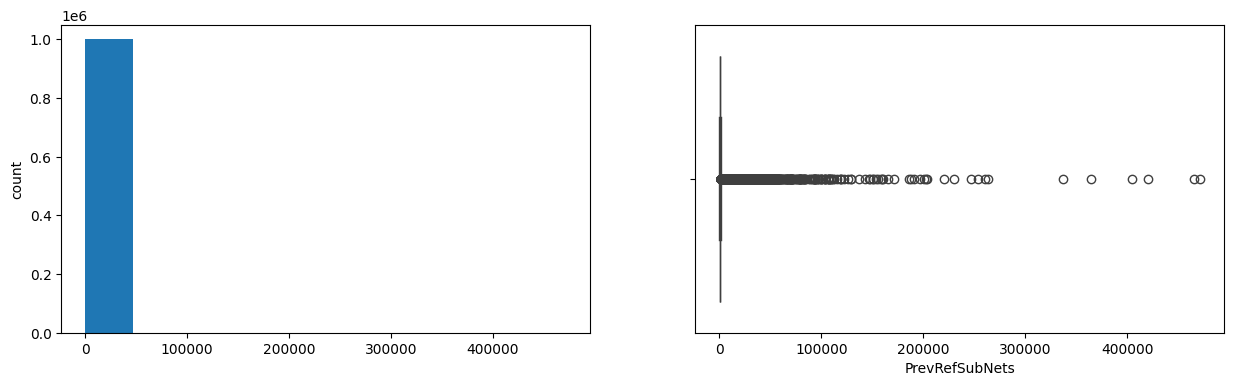

PrevRefIPs
Skew : 165.38


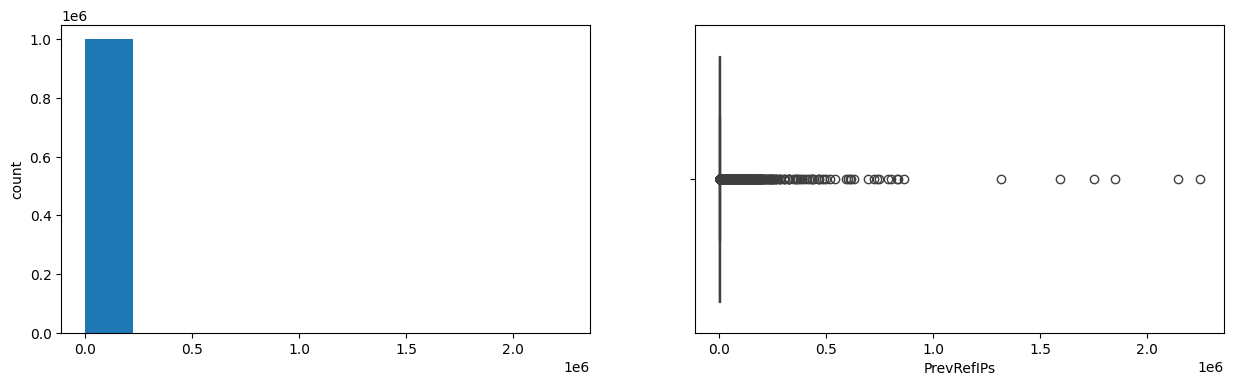

In [37]:
''' EDA Univariate Analysis

Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

'''
print('a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.')
for col in num_cols0:
    print(col)
    print('Skew :', round(data_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_df[col])
    plt.show()

for col in num_cols1:
    print(col)
    print('Skew :', round(rating_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    rating_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=rating_df[col])
    plt.show()

for col in num_cols2:
    print(col)
    print('Skew :', round(raw_data_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    raw_data_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=raw_data_df[col])
    plt.show()
